<a href="https://colab.research.google.com/github/kirito28-tt/stably-text-to-image/blob/main/stablyy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 stable-diffusion-pytorch

## Install (takes about 1~5 minutes)

In [1]:
%cd /content
!git clone https://github.com/kjsman/stable-diffusion-pytorch

/content
Cloning into 'stable-diffusion-pytorch'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 92 (delta 51), reused 42 (delta 42), pack-reused 25 (from 1)
Receiving objects: 100% (92/92), 26.54 KiB | 2.65 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [2]:
# Note that all depencdencies of stable-diffusion-pytorch is pre-installed
# on Colab environment. This cell basically does nothing on Colab.
%cd /content/stable-diffusion-pytorch
%pip install -r requirements.txt

/content/stable-diffusion-pytorch
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Succes

In [3]:
%cd /content/stable-diffusion-pytorch
!wget https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar
!tar -xf data.v20221029.tar

/content/stable-diffusion-pytorch
--2025-06-18 17:08:21--  https://huggingface.co/jinseokim/stable-diffusion-pytorch-data/resolve/main/data.v20221029.tar
Resolving huggingface.co (huggingface.co)... 3.163.189.90, 3.163.189.74, 3.163.189.114, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.90|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/3d/4b/3d4ba72796d9403407c086755997d25023b743581f1dfb562b61d3c6a3bd773f/9708a9fa7fb0805bd1a58896e5adf9666237361e57c2578e8a76e216568b9d77?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27data.v20221029.tar%3B+filename%3D%22data.v20221029.tar%22%3B&response-content-type=application%2Fx-tar&Expires=1750270102&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MDI3MDEwMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy8zZC80Yi8zZDRiYTcyNzk2ZDk0MDM0MDdjMDg2NzU1OTk3ZDI1MDIzYjc0MzU4MWYxZGZiNTYyYjYxZDNjNmEzYmQ3NzNmLzk3MDhhOWZhN2ZiM

## Run

In [ ]:
#@title Preload models (takes about ~20 seconds on default settings)

from stable_diffusion_pytorch import model_loader
models = model_loader.preload_models('cpu')

100%|██████████| 50/50 [00:25<00:00,  1.97it/s]


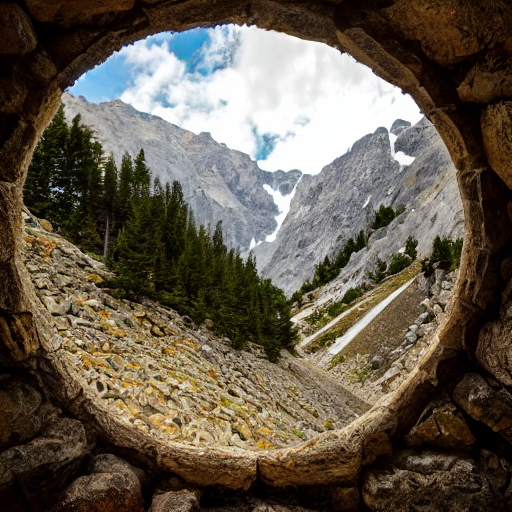

In [ ]:
#@title Inference (takes about 30~40 seconds on default settings)

from stable_diffusion_pytorch import pipeline

prompt = "mountain"  #@param { type: "string" }
prompts = [prompt]

uncond_prompt = ""  #@param { type: "string" }
uncond_prompts = [uncond_prompt] if uncond_prompt else None

upload_input_image = False  #@param { type: "boolean" }
input_images = None
if upload_input_image:
    from PIL import Image
    from google.colab import files
    print("Upload an input image:")
    path = list(files.upload().keys())[0]
    input_images = [Image.open(path)]

strength = 0.8  #@param { type:"slider", min: 0, max: 1, step: 0.01 }

do_cfg = True  #@param { type: "boolean" }
cfg_scale = 7.5  #@param { type:"slider", min: 1, max: 14, step: 0.5 }
height = 512  #@param { type: "integer" }
width = 512  #@param { type: "integer" }
sampler = "k_lms"  #@param ["k_lms", "k_euler", "k_euler_ancestral"]
n_inference_steps = 50  #@param { type: "integer" }

use_seed = False  #@param { type: "boolean" }
if use_seed:
    seed = 42  #@param { type: "integer" }
else:
    seed = None

pipeline.generate(prompts=prompts, uncond_prompts=uncond_prompts,
                  input_images=input_images, strength=strength,
                  do_cfg=do_cfg, cfg_scale=cfg_scale,
                  height=height, width=width, sampler=sampler,
                  n_inference_steps=n_inference_steps, seed=seed,
                  models=models, device='cuda', idle_device='cpu')[0]